# **Carregar pacotes e Exibir imagem**

In [1]:
# Importação de bibliotecas essenciais
import idx2numpy
import matplotlib.pyplot as plt
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import classification_report, confusion_matrix

2025-03-05 14:17:52.566938: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-05 14:17:52.598276: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 14:17:52.870116: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2025-03-05 14:17:52.871981: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-05 14:17:54.249975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

# **Etapa 1: Preparação do ambiente e visualização inicial**

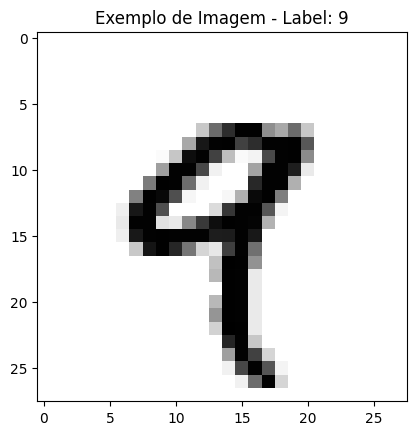

In [2]:
# Obtém o diretório atual onde o script está sendo executado
current_dir = os.getcwd()

# Define o caminho relativo dos arquivos
train_images_path = os.path.join(current_dir, "train-images.idx3-ubyte")
train_labels_path = os.path.join(current_dir, "train-labels.idx1-ubyte")
test_images_path = os.path.join(current_dir, "t10k-images.idx3-ubyte")
test_labels_path = os.path.join(current_dir, "t10k-labels.idx1-ubyte")

# Verifica se os arquivos existem antes de tentar usá-los
for file in [train_images_path, train_labels_path, test_images_path, test_labels_path]:
    if not os.path.exists(file):
        print(f"Erro: Arquivo não encontrado - {file}")
        exit()

# Converte os arquivos IDX para arrays numpy
train_images = idx2numpy.convert_from_file(train_images_path)
train_labels = idx2numpy.convert_from_file(train_labels_path)
test_images = idx2numpy.convert_from_file(test_images_path)
test_labels = idx2numpy.convert_from_file(test_labels_path)

# Normalização dos valores de pixel (0-255 -> 0-1)
train_images = train_images / 255.0
test_images = test_images / 255.0

# Visualização inicial de uma imagem do conjunto de treino
plt.imshow(train_images[4], cmap=plt.cm.binary)
plt.title(f"Exemplo de Imagem - Label: {train_labels[4]}")
plt.show()

# **Construção do modelo**

In [3]:

model = Sequential([
    Flatten(input_shape=(28, 28)),  # Achata as imagens 28x28 para um vetor de 784 elementos
    Dense(128, activation='relu'),  # Primeira camada oculta com 128 neurônios
    Dense(64, activation='relu'),   # Segunda camada oculta com 64 neurônios
    Dense(10, activation='softmax') # Camada de saída com 10 neurônios (1 para cada dígito)
])

# **Compilação do modelo**

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **Treinamento**

In [5]:
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.2646 - accuracy: 0.9215 - val_loss: 0.1477 - val_accuracy: 0.9532
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1091 - accuracy: 0.9663 - val_loss: 0.1072 - val_accuracy: 0.9664
Epoch 3/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0756 - accuracy: 0.9765 - val_loss: 0.0960 - val_accuracy: 0.9693
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0545 - accuracy: 0.9829 - val_loss: 0.1073 - val_accuracy: 0.9691
Epoch 5/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0453 - accuracy: 0.9852 - val_loss: 0.1009 - val_accuracy: 0.9733
Epoch 6/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0354 - accuracy: 0.9886 - val_loss: 0.0868 - val_accuracy: 0.9768
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0285 - accuracy: 0.9904 - val_loss: 0.1082 - val_accuracy

# **Avaliação no conjunto de teste e Relatório de classificação**

O método de avaliação eu escolhi foi a Acurácia, que mede a proporção de previsões corretas
em relação ao total de previsões realizadas. A acurácia é uma métrica boa para este
problema, pois o conjunto de dados MNIST é balanceado, com um número equivalente de imagens
para cada classe (dígitos de 0 a 9). Com isso, a acurácia fornece uma avaliação clara do
desempenho do modelo, refletindo diretamente o sucesso na classificação dos dígitos. 

In [6]:

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f"Perda no conjunto de teste: {test_loss:.4f}")
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

predicted_labels = np.argmax(model.predict(test_images), axis=-1)
print(classification_report(test_labels, predicted_labels))

313/313 [==============================] - 1s 1ms/step - loss: 0.1102 - accuracy: 0.9734
Perda no conjunto de teste: 0.1102
Acurácia no conjunto de teste: 0.9734
313/313 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.96      0.99      0.97      1010
           4       1.00      0.94      0.97       982
           5       0.99      0.95      0.97       892
           6       0.98      0.99      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.92      0.99      0.95       974
           9       0.95      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



# **Matriz de confusão**

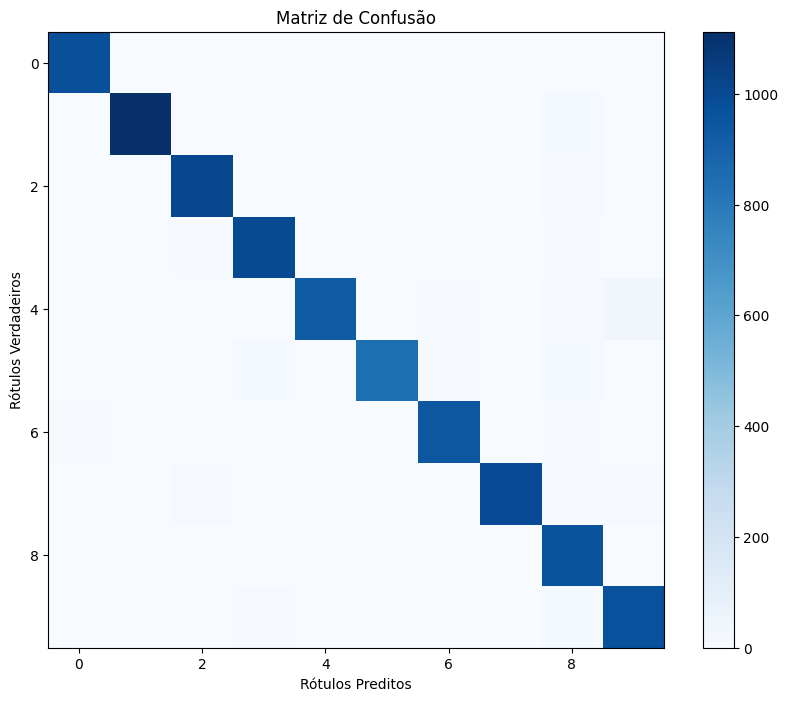

In [7]:
conf_matrix = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.title("Matriz de Confusão")
plt.xlabel("Rótulos Preditos")
plt.ylabel("Rótulos Verdadeiros")
plt.colorbar()
plt.show()

# **Visualização do processo de aprendizado**

Para demonstrar que a arquitetura proposta possui boa generalização do conhecimento,
dividi os dados em conjuntos de treinamento, validação e teste. Monitorei a acurácia
nos conjuntos de treinamento e validação durante o treinamento para garantir que o modelo
não está apenas "decorando" os dados de treinamento (overfitting), mas sim aprendendo
padrões que podem ser aplicados a dados novos. Além disso, utilizei técnicas como
regularização (dropout, L2 regularization) e early stopping para prevenir overfitting
e garantir que o modelo generalize bem. 


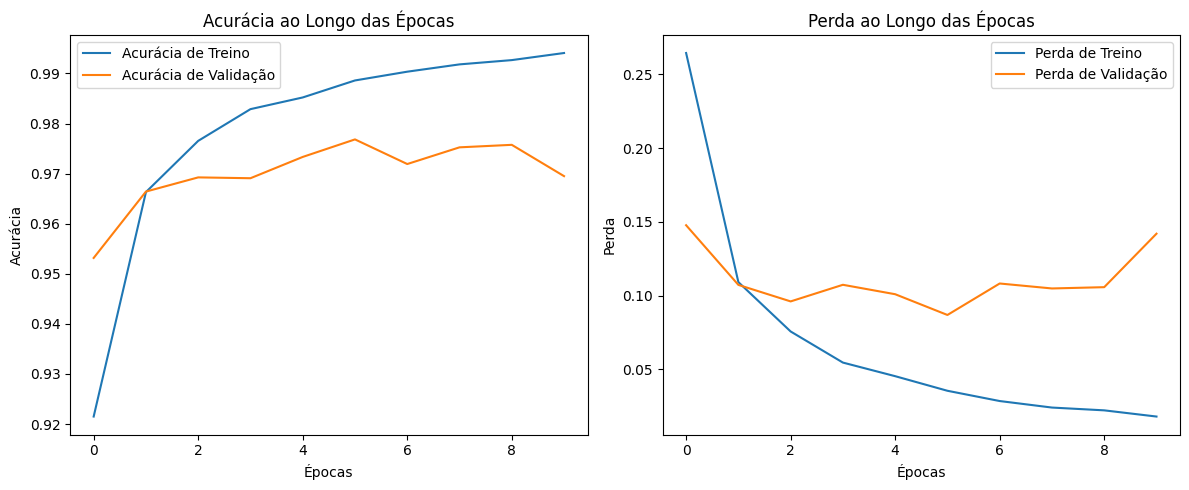

In [8]:
plt.figure(figsize=(12, 5))

# Gráfico de acurácia
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Acurácia de Treino')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.title("Acurácia ao Longo das Épocas")
plt.xlabel("Épocas")
plt.ylabel("Acurácia")
plt.legend()

# Gráfico de perda
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Perda de Treino')
plt.plot(history.history['val_loss'], label='Perda de Validação')
plt.title("Perda ao Longo das Épocas")
plt.xlabel("Épocas")
plt.ylabel("Perda")
plt.legend()

plt.tight_layout()
plt.show()